# Super Store Customer Segmentation using K-Means Clustering 

In [2]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#Importing the super store dataset
data_df = pd.read_csv('Mall_Customers.csv')

## Exploratory Data Analysis 

In [5]:
#printing first 5 rows of the dataset
data_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The Super Store dataset consists of records of customers who provided their information such as their gender, age and annual income while applying for the membership card. The customers use this card while making any purchase from the Super Store and therefore, the Super Store has the purchase history of all customers using which they assigned a spending score to each customer on a scale of 1-100 (1 being low).

The spending score was calculate on basis of the following factors:
1. Income
2. Number of times in a week they show up in the store
3. Amount of dollars they spent in a year

In [6]:
data_df.shape

(200, 5)

The dataset has record of 200 customers.

In [7]:
data_df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

The dataset has 5 columns: Customer ID, Genre, Age, Annual Income and Spending Score.

In [11]:
data_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


We can see that there are no missing values in the dataset.

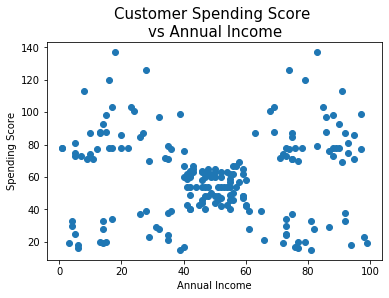

In [31]:
plt.scatter(data_df['Spending Score (1-100)'], data_df['Annual Income (k$)'])
plt.title('Customer Spending Score \nvs Annual Income', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

The above plot shows the variation in Customers' Spending Score with the change in their Annual Income for this Super Store. My goal is to segment the customers within different groups or clusters to help the Super Store design various marketing strategies to target the different customer segments.

## Finding optimal number of clusters 

In [13]:
#subsetting the dataset to just work with the Annual Income and Spending Score columns
X = data_df.iloc[:, [3,4]].values

In [19]:
#Using Elbow Plot to find optimal number of clusters
from sklearn.cluster import KMeans

An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimise the sum.

In [20]:
#Calculating WCSS - Within Cluster Sum of Squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Here, I am trying to calculate the WCSS for 1 to 10 clusters.  
In order to avoid the 'Random Initialization Trap', I have used the k-means++ method to assign initial centroids.

### Plotting Elbow Plot

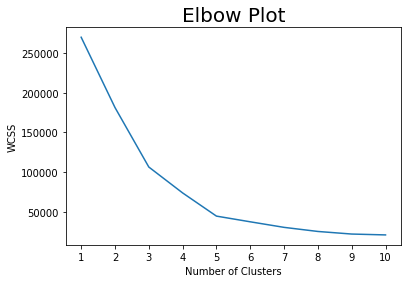

In [24]:
ticks = range(1, 11)
plt.plot(ticks, wcss)
plt.title('Elbow Plot', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(min(ticks), max(ticks)+1, 1.0))
plt.show()

It can be seen from the above Elbow Plot that 5 clusters would be optimal for this dataset.

## Performing K-Means Clustering 

In [32]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

Using the fit predict method of K Means Clustering to assign each customer to a specific cluster denoted by its cluster number.

### Visualizing the Clusters

<function matplotlib.pyplot.show(*args, **kw)>

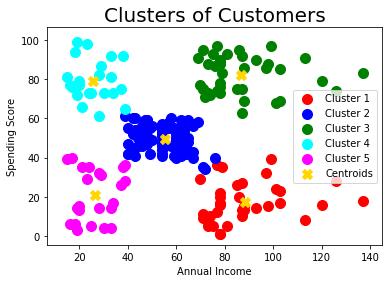

In [43]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

#plotting cluster centers or centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'gold', label = 'Centroids', marker = 'X')

plt.title('Clusters of Customers', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show

That gives us the segmentation of all customers in 5 different groups/clusters. The customers in each cluster can be labelled as:
1. Cluster 1 - High Annual Income and Low Spending Score - Careful Customers
1. Cluster 2 - Medium Annual Income and Medium Spending Score - Standard Customers
1. Cluster 3 - High Annual Income and High Spending Score - Target Customers
1. Cluster 4 - Low Annual Income and High Spending Score - Careless Customers
1. Cluster 5 - Low Annual Income and Low Spending Score - Sensible Customers

Let's plot again with the finally labelled clusters of customers.

<function matplotlib.pyplot.show(*args, **kw)>

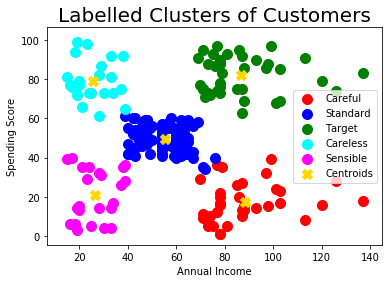

In [44]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

#plotting cluster centers or centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'gold', label = 'Centroids', marker = 'X')

plt.title('Labelled Clusters of Customers', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show